# da qui in poi creo un knowledge graph from scratch

In [1]:
from neo4j import GraphDatabase

# Connessione a Neo4j (modifica i dettagli se necessario)
URI = "neo4j+s://efe380df.databases.neo4j.io"  # Cambia se usi Neo4j in cloud
USERNAME = "neo4j"
PASSWORD = "epyvyKxwn67vNG3it7mQ3ij2Wm2FLDT21eAJhhH607Q"


# Funzione per eseguire query
def run_query(query):
    with GraphDatabase.driver(URI, auth=(USERNAME, PASSWORD)) as driver:
        with driver.session() as session:
            session.run(query)

# Creazione del Knowledge Graph
queries = [
    "CREATE (:Persona {nome: 'Davide'})",
    "CREATE (:Persona {nome: 'Alice'})",
    "CREATE (:Persona {nome: 'Luca'})",
    "CREATE (:Città {nome: 'Milano'})",
    "CREATE (:Città {nome: 'Roma'})",
    "MATCH (d:Persona {nome: 'Davide'}), (m:Città {nome: 'Milano'}) CREATE (d)-[:VIVE_IN]->(m);",
    "MATCH (a:Persona {nome: 'Alice'}), (r:Città {nome: 'Roma'}) CREATE (a)-[:VIVE_IN]->(r);",
    "MATCH (l:Persona {nome: 'Luca'}), (m:Città {nome: 'Milano'}) CREATE (l)-[:VIVE_IN]->(m);",
    "MATCH (d:Persona {nome: 'Davide'}), (a:Persona {nome: 'Alice'}) CREATE (d)-[:CONOSCE]->(a);",
    "MATCH (a:Persona {nome: 'Alice'}), (l:Persona {nome: 'Luca'}) CREATE (a)-[:CONOSCE]->(l);",
    "MATCH (d:Persona {nome: 'Davide'}), (l:Persona {nome: 'Luca'}) CREATE (d)-[:CONOSCE]->(l);"
]

# Esegui tutte le query
for query in queries:
    run_query(query)

print("Knowledge Graph creato con successo!")


ValueError: Cannot resolve address efe380df.databases.neo4j.io:7687

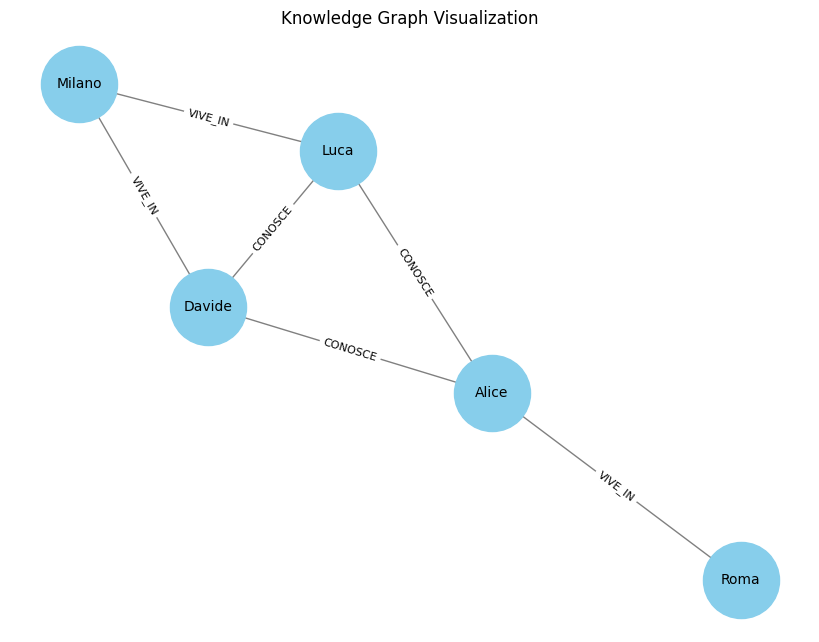

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase



# Funzione per ottenere i nodi e relazioni
def get_graph():
    G = nx.Graph()
    with GraphDatabase.driver(URI, auth=(USERNAME, PASSWORD)) as driver:
        with driver.session() as session:
            # Query per ottenere i nodi e le relazioni
            result = session.run("MATCH (a)-[r]->(b) RETURN a.nome AS from, type(r) AS relation, b.nome AS to")

            for record in result:
                nodo_a = record["from"]
                nodo_b = record["to"]
                relazione = record["relation"]
                
                # Verifica che i nodi non siano None
                if nodo_a and nodo_b:
                    G.add_edge(nodo_a, nodo_b, label=relazione)

    return G

# Disegna il grafo con NetworkX e Matplotlib
def draw_graph():
    G = get_graph()
    pos = nx.spring_layout(G)  # Disposizione automatica
    plt.figure(figsize=(8,6))
    
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=3000, font_size=10)
    
    # Disegna le etichette degli archi
    edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    
    plt.title("Knowledge Graph Visualization")
    plt.show()

# Esegui la funzione
draw_graph()


# da qui in poi creo un knowledge graph con langchain

In [1]:
import os
from dotenv import load_dotenv
from langchain_community.graphs import Neo4jGraph  # Import corretto per Neo4jGraph

# Carica le variabili d'ambiente dal file .env
load_dotenv()

# Definizione delle variabili richieste
REQUIRED_ENV_VARS = [
    "OPENAI_API_KEY",
    "TOGETHER_API_KEY",
    "NEO4J_URI",
    "NEO4J_USERNAME",
    "NEO4J_PASSWORD"
]

# Verifica che tutte le variabili siano presenti
missing_vars = [var for var in REQUIRED_ENV_VARS if os.getenv(var) is None]

if missing_vars:
    raise ValueError(f"❌ Le seguenti variabili d'ambiente sono mancanti nel file .env: {', '.join(missing_vars)}")

# Imposta esplicitamente le variabili d'ambiente nel sistema (opzionale)
for var in REQUIRED_ENV_VARS:
    os.environ[var] = os.getenv(var)

# Stampa di debug (puoi rimuoverla)
print("✅ Tutte le variabili d'ambiente sono state caricate correttamente!")

# Recupera le variabili d'ambiente per l'uso
openai_api_key = os.getenv("OPENAI_API_KEY")
together_api_key = os.getenv("TOGETHER_API_KEY")
neo4j_uri = os.getenv("NEO4J_URI")
neo4j_username = os.getenv("NEO4J_USERNAME")
neo4j_password = os.getenv("NEO4J_PASSWORD")

# Stampa per confermare che le variabili sono caricate (senza mostrare chiavi sensibili)
print(f"🔹 OPENAI_API_KEY: {'OK' if openai_api_key else 'MANCANTE'}")
print(f"🔹 TOGETHER_API_KEY: {'OK' if together_api_key else 'MANCANTE'}")
print(f"🔹 NEO4J_URI: {neo4j_uri}")
print(f"🔹 NEO4J_USERNAME: {neo4j_username}")
print(f"🔹 NEO4J_PASSWORD: {'OK' if neo4j_password else 'MANCANTE'}")

# Configura la connessione a Neo4j
try:
    enhanced_graph = Neo4jGraph(url=neo4j_uri, username=neo4j_username, password=neo4j_password)
    print("✅ Connessione a Neo4j riuscita!")
except Exception as e:
    print(f"❌ Errore nella connessione a Neo4j: {e}")
    raise

# Alternativa: Creazione di un'altra istanza del grafo, se necessario
graph = Neo4jGraph(url=neo4j_uri, username=neo4j_username, password=neo4j_password)


✅ Tutte le variabili d'ambiente sono state caricate correttamente!
🔹 OPENAI_API_KEY: OK
🔹 TOGETHER_API_KEY: OK
🔹 NEO4J_URI: neo4j+s://8ce26383.databases.neo4j.io
🔹 NEO4J_USERNAME: neo4j
🔹 NEO4J_PASSWORD: OK


/var/folders/bx/13v8fyy9619c2s895y535c9c0000gn/T/ipykernel_83977/1925632094.py:46: LangChainDeprecationWarning: The class `Neo4jGraph` was deprecated in LangChain 0.3.8 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-neo4j package and should be used instead. To use it run `pip install -U :class:`~langchain-neo4j` and import as `from :class:`~langchain_neo4j import Neo4jGraph``.
  enhanced_graph = Neo4jGraph(url=neo4j_uri, username=neo4j_username, password=neo4j_password)


✅ Connessione a Neo4j riuscita!


In [4]:
from langchain_neo4j import Neo4jGraph

graph = Neo4jGraph()

# Import movie information

movies_query = """
LOAD CSV WITH HEADERS FROM 
'https://raw.githubusercontent.com/tomasonjo/blog-datasets/main/movies/movies_small.csv'
AS row
MERGE (m:Movie {id:row.movieId})
SET m.released = date(row.released),
    m.title = row.title,
    m.imdbRating = toFloat(row.imdbRating)
FOREACH (director in split(row.director, '|') | 
    MERGE (p:Person {name:trim(director)})
    MERGE (p)-[:DIRECTED]->(m))
FOREACH (actor in split(row.actors, '|') | 
    MERGE (p:Person {name:trim(actor)})
    MERGE (p)-[:ACTED_IN]->(m))
FOREACH (genre in split(row.genres, '|') | 
    MERGE (g:Genre {name:trim(genre)})
    MERGE (m)-[:IN_GENRE]->(g))
"""

graph.query(movies_query)
print(graph.schema)

Node properties:
Movie {id: STRING, released: DATE, title: STRING, imdbRating: FLOAT}
Person {name: STRING}
Genre {name: STRING}
Relationship properties:

The relationships:
(:Movie)-[:IN_GENRE]->(:Genre)
(:Person)-[:DIRECTED]->(:Movie)
(:Person)-[:ACTED_IN]->(:Movie)


In [ ]:
from langchain_neo4j import GraphCypherQAChain
from langchain_together import ChatTogether
import together



# Configura Together AI con la API Key presa da .env
together.api_key = together_api_key
# Modello AI supportato da Together AI
llm = ChatTogether(model="deepseek-ai/DeepSeek-V3", temperature=0)

# Creazione della catena di interrogazione
chain = GraphCypherQAChain.from_llm(
    graph=enhanced_graph, llm=llm, verbose=True, allow_dangerous_requests=True
)

# Esegui la query
response = chain.invoke({"query": "What was the cast of the Casino?"})
print(response)




> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (p:Person)-[:ACTED_IN]->(m:Movie {title: "Casino"}) RETURN p.name
Full Context:
[{'p.name': 'Robert De Niro'}, {'p.name': 'Joe Pesci'}, {'p.name': 'Sharon Stone'}, {'p.name': 'James Woods'}]

> Finished chain.
{'query': 'What was the cast of the Casino?', 'result': 'The cast of *Casino* includes Robert De Niro, Joe Pesci, Sharon Stone, and James Woods.'}


# Knowledge Graph Construction and Querying with Deepseek-R1 7B vs Mistral 7B on Neo4j (non funziona)


In [7]:
from llama_index.core import (
    PropertyGraphIndex,
    SimpleDirectoryReader,
    StorageContext,
    Settings,
)
from llama_index.llms.llama_cpp import LlamaCPP   # version 0.4.0
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.graph_stores.neo4j import Neo4jPropertyGraphStore

/Users/david/Desktop/AINEXXO/vscode/kg_qa/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from ollama import Client

def generate_response(model_name="smollm:135m", prompt="", host="http://localhost:10000"):
    """
    Generates a response from the specified model using the Ollama client.
    
    :param model_name: Name of the model to use for generation (default: "smollm:135m").
    :param prompt: The input prompt to send to the model.
    :param host: Host address where the Ollama client is running (default: "http://localhost:10000").
    :return: The generated response.
    """
    client = Client(host=host)
    response = client.generate(model=model_name, prompt=prompt)
    return response

# Example usage
if __name__ == "__main__":
    print(generate_response(prompt="What was the cast of the Casino?"))


model='smollm:135m' created_at='2025-03-17T09:31:31.904412Z' done=True done_reason='stop' total_duration=25576386792 load_duration=25744375 prompt_eval_count=18 prompt_eval_duration=40000000 eval_count=2759 eval_duration=25509000000 response='The cast of "Casino" is a fictional character created by the author, Robert E. Howard, who wrote it in 1965 as part of his novel, "A Streetcar Named Desire." The play follows the story of Blanchet and her sister, Blanchet and her brother, Blanchet and his friend, Blanchet\'s sister, and their tumultuous relationship with the townspeople.\n\nHere are some key aspects of the cast of "Casino":\n\n1. **Blanchet and her sister**: Blanchet is a complex and nuanced character in the play, torn between her desire for independence and her need for connection with others. She\'s a passionate and independent woman who struggles to maintain her relationships with her brother and friends.\n2. **Blanchet\'s sister Blanchet and her brother Blanchet**: Blanchet is

In [8]:
'''llm = LlamaCPP(
    model_path='altro/DeepSeek-R1-Distill-Qwen-7B-Q2_K.gguf',
    temperature=0.6,
    max_new_tokens=2000,
    context_window=4096,
    model_kwargs={"n_gpu_layers": 1},
    verbose=False                                                                                                                                                                                              
)
print(llm)
'''

'llm = LlamaCPP(\n    model_path=\'altro/DeepSeek-R1-Distill-Qwen-7B-Q2_K.gguf\',\n    temperature=0.6,\n    max_new_tokens=2000,\n    context_window=4096,\n    model_kwargs={"n_gpu_layers": 1},\n    verbose=False                                                                                                                                                                                              \n)\nprint(llm)\n'

In [9]:

embed_model = HuggingFaceEmbedding()
Settings.llm = generate_response
Settings.embed_model = embed_model
Settings.chunk_size = 512

AssertionError: 

In [ ]:
url = "neo4j+s://8ce26383.databases.neo4j.io"
username = "neo4j"
password =  "2_p0ZNH3Z4W-sqFOWGYJjZ9F97RX462FCsUTsmhE2PE"
database = "neo4j"

graph_store = Neo4jPropertyGraphStore(
    username=username,
    password=password,
    url=url,
    database=database,
)

In [ ]:
import nest_asyncio
nest_asyncio.apply()
gstorage_context = StorageContext.from_defaults(graph_store=graph_store)                                                                                                                                       
documents = SimpleDirectoryReader("altro/GraphRAG").load_data()
kg_index = PropertyGraphIndex.from_documents(
    documents,
    storage_context=gstorage_context,
    max_triplets_per_chunk=10,
    include_embeddings=True,
    property_graph_store=graph_store,
)

ImportError: Please install nbconvert 'pip install nbconvert' 

In [ ]:

kg_keyword_query_engine = kg_index.as_query_engine(
    include_text=True,
    similarity_top_k=2,
)
query = 'When should simplified routing be used on SteelHeads?'
response = kg_keyword_query_engine.query(f'<｜User｜>{query}<｜Assistant｜>')

# nuovo tentativo


In [20]:
from langchain.text_splitter import TextSplitter

class CustomDelimiterTextSplitter(TextSplitter):
    def __init__(self, delimiter="---", **kwargs):
        super().__init__(**kwargs)
        self.delimiter = delimiter

    def split_text(self, text: str):
        # Dividi il testo in base al delimitatore e rimuovi spazi inutili
        return [chunk.strip() for chunk in text.split(self.delimiter) if chunk.strip()]
    
# Apri il file in modalità lettura e leggi tutto il contenuto come stringa
with open('input.md', 'r', encoding='utf-8') as file:
    testo = file.read()
splitter = CustomDelimiterTextSplitter(delimiter="---")
chunks = splitter.split_text(testo)
print(chunks)


FileNotFoundError: [Errno 2] No such file or directory: 'input.md'

In [9]:
import requests
from bs4 import BeautifulSoup

def estrai_testo_da_link_wikipedia(link):
    # Verifica che il link sia di Wikipedia
    if "wikipedia.org" not in link:
        print("Il link fornito non è una pagina di Wikipedia.")
        return None

    # Effettua la richiesta HTTP per ottenere il contenuto della pagina
    response = requests.get(link)

    # Verifica che la richiesta sia andata a buon fine
    if response.status_code != 200:
        print("Impossibile accedere alla pagina. Codice di stato:", response.status_code)
        return None

    # Analizza il contenuto HTML con BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Trova il contenuto principale dell'articolo di Wikipedia
    contenuto_pagina = soup.find('div', {'class': 'mw-parser-output'})

    # Estrai il testo paragrafo per paragrafo
    testo = ""
    if contenuto_pagina:
        paragrafi = contenuto_pagina.find_all('p')
        for paragrafo in paragrafi:
            testo += paragrafo.get_text()

    # Mostra i primi 1000 caratteri del testo
    print(f"Testo estratto:\n{testo[:1000]}...")

    return testo

# Esempio di utilizzo:
link_wikipedia = "https://it.wikipedia.org/wiki/BTS"  # Sostituisci con il link che vuoi analizzare
text = estrai_testo_da_link_wikipedia(link_wikipedia)


Testo estratto:
I BTS (방탄소년단?, 防彈少年團?, Bangtan SonyeondanLR, Pangt'an SonyǒndanMR), conosciuti anche come Bangtan Boys,[5] sono un gruppo musicale K-pop sudcoreano formatosi a Seul nel 2013 e composto da RM, Jin, Suga, J-Hope, Jimin, V e Jung Kook.
La band ha esordito il 13 giugno 2013 con il single album 2 Cool 4 Skool,[6] incentrato sui pregiudizi della società nei confronti dei giovani, e con le opere successive ha consolidato la propria reputazione di gruppo socialmente consapevole.[7][8] Nella loro musica, di stampo hip-hop, abbracciano un'ampia gamma di generi ed esplorano temi differenti, dalle ansie scolastiche alla situazione sociale, dalla salute mentale all'amor proprio.[5][9] Nel 2017 hanno introdotto il k-pop nel mercato mainstream statunitense,[10][11] diventando in seguito il primo artista sudcoreano a raggiungere sia la vetta della Billboard 200,[12] che della Billboard Hot 100.[13] Nel 2020 e nel 2021 sono stati il primo artista per numero di vendite a livello mondiale

In [12]:
print("nput: 48 Vdc nom (42 to 54 Vdc). \nCurrent consumption @ 48 V: 30 mA with relay energized, typical. \nPower dissipation: 1.5 W with 48 V input voltage and relay energized, typical. \nIsolation (Test Voltage): Input/Output 2.5 KV. \n\nOutput: voltage free SPDT relay contact.\nTerminals 13-15, open in normally energized condition, closed when relay is \nde-energized (safe state). \nService load output (not SIL) at terminals 13-14 is normally open when relay is \nde-energized, closed in energized relay condition \nContact material: Ag Alloy (Cd free) or AgSnO2. \nContact rating: 10 A 250 Vac 2500 VA, 10 A 250 Vdc 300 W (resistive load). \nContact inrush current: 16 A at 24 Vdc, 250 Vac. \nDC Load breaking capacity: \nV (V) \nMechanical / Electrical life: 10 * 106 / 5 * 104 operation, typical. \nOperate / Release time: 15 / 5 ms typical. \nFrequency response: 10 Hz maximum. \n\n\n\nCompatibility:\nCE mark compliant, conforms to Directive: \n\n\n\nEnvironmental conditions:\nOperating: temperature limits - 40 to + 60 \u00b0C, relative humidity 95 %, up to 55 \u00b0C. \nStorage: temperature limits - 45 to + 80 \u00b0C. \n\n\nApprovals:\nT\u00dcV Certificate No. C-IS-272994-01 SIL 3 conforms to IEC61508:2010 Ed.2. \nSIL 3 Functional Safety T\u00dcV Certificate conforms to IEC61508:2010 Ed.2, for Management of Functional Safety. \n\n\nMounting:\nT35 DIN-Rail according to EN50022 or on customized Termination Board. \nWeight: about 165 g. \nConnection: by polarized plug-in disconnect screw terminal blocks to accommodate terminations up to 2.5 mm2. \nLocation: installation in Safe Area. \nProtection class: IP 20. \nDimensions: Width 22.5 mm, Depth 123 mm, Height 120 mm. \n\n\n")

nput: 48 Vdc nom (42 to 54 Vdc). 
Current consumption @ 48 V: 30 mA with relay energized, typical. 
Power dissipation: 1.5 W with 48 V input voltage and relay energized, typical. 
Isolation (Test Voltage): Input/Output 2.5 KV. 

Output: voltage free SPDT relay contact.
Terminals 13-15, open in normally energized condition, closed when relay is 
de-energized (safe state). 
Service load output (not SIL) at terminals 13-14 is normally open when relay is 
de-energized, closed in energized relay condition 
Contact material: Ag Alloy (Cd free) or AgSnO2. 
Contact rating: 10 A 250 Vac 2500 VA, 10 A 250 Vdc 300 W (resistive load). 
Contact inrush current: 16 A at 24 Vdc, 250 Vac. 
DC Load breaking capacity: 
V (V) 
Mechanical / Electrical life: 10 * 106 / 5 * 104 operation, typical. 
Operate / Release time: 15 / 5 ms typical. 
Frequency response: 10 Hz maximum. 



Compatibility:
CE mark compliant, conforms to Directive: 



Environmental conditions:
Operating: temperature limits - 40 to + 60 

In [7]:
from langchain_openai import ChatOpenAI
from langchain_neo4j import Neo4jGraph
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_core.documents import Document
import os
from langchain_together import ChatTogether
import together
from langchain_google_genai import GoogleGenerativeAI

#ChatOpenAI(model="gpt-4o")
#ChatTogether(model="meta-llama/Llama-3.3-70B-Instruct-Turbo", temperature=0) ,
#ChatTogether(model="deepseek-ai/DeepSeek-V3", temperature=0.5) 
#GoogleGenerativeAI(model="gemini-2.0-flash",google_api_key=os.getenv("GOOGLE_API_KEY"))
# Configura Together AI con la API Key presa da .env
together.api_key = os.getenv("TOGETHER_API_KEY")
neo4j_uri = os.getenv("NEO4J_URI1")
neo4j_username = os.getenv("NEO4J_USERNAME")
neo4j_password = os.getenv("NEO4J_PASSWORD1")
graph = Neo4jGraph(url=neo4j_uri, username=neo4j_username, password=neo4j_password)
# Inizializzazione del trasformatore LLM con il modello GPT-4o
llm_transformer = LLMGraphTransformer(
    #prompt
    llm=ChatOpenAI(model="gpt-4o"),
    allowed_nodes=["ProductNode", "FeatureNode", "InterfaceNode", "InstallationNode", "CertificationNode", "SafetyNode", "SafetyParametersNode", "OrderNode", "StartUpNode", "FieldConnectionNode", "OperationModeNode", "ConfigurationModeNode"],
    allowed_relationships=["hasFeature", "hasTechnicalData", "hasUserInterface", "hasSerialInterface", "hasInstallation", "hasCertification", "hasSafetyRequirement", "hasSafetyParameter", "hasOrderCode", "hasStartUpProcedure", "hasFieldConnection", "hasOperationMode", "hasConfigurationMode"],
    node_properties=["label", "name", "family", "description", "use", "field_area", "install_area", "models", "source_text", "source_embedding", "value", "unit", "condition","parameter_name", "parameter_value", "table", "installation_details", "certification_number", "standards", "title", "parameters", "code", "procedure", "type", "instructions"],
)

In [8]:

    testo = """
{
    "features": "FEATURES\n1. SIL 2 / SC 3 (pending)\n2. Input from Zone 0 / Division 1 (pending)\n3. Installation in Zone 2 / Division 2 (pending)\n4. Loop disconnection to ease maintenance operations\n5. HART\u00ae compatible\n6. Line & Load short/open circuit programmable diagnostics\n7. Out-of-range fault with programmable thresholds\n8. Field fault mirroring to the DCS/PLC IO Card\n9. High Accuracy\n10. Three port isolation, Input/Output/Supply\n",
    "footer": "Functional Safety Management Certification: Functional Safety Management Certification:\nGM International is certified to conform to IEC61508:2010 part 1 clauses 5-6 for safety related systems up to and included SIL3. In addition, GM International products have been granted I.S. certificates from the most credited Notified Bodies in the world.\nDisclaimer: Data specified in this document are merely descriptive of the products and should be integrated with relevant technical specifications. Our products are in constant development and the information presented herein refers to the time of document issue. No statements concerning a certain condition or suitability for a certain application can be derived from our information. The information given does not release the user from the obligation of own judgment and verification. Terms & Conditions can be found at our website. For more information refer to istruction manual.\nDTS Code: DTS1948-0\nISM Code: ISM0617-0\nFM Code: ISM0633-0\nCompany: G.M. International s.r.l.\n",
    "general": "Language: English\nWebsite: www.gminternational.com\nInfo: PRELIMINARY INFORMATION\n",
    "model": "Family: Intrinsically Safe Isolators > Analog Output\nName: X1-IS-AO-02\nLong Description: The Isolating Driver X1-IS-AO-02 module is a high integrity analog output interface suitable for applications requiring SIL 2 level in safety related systems for high risk industries. It isolates and transfers a 4-20 mA signal from a controller located in Safe Area to a load in Hazardous Area. The circuit allows bi-directional communication signals, for HART\u00ae smart positioners. Line and load open/short circuit detection is provided: the fault in the field is directly mirrored to the PLC AO card as open circuit and it is also reported on the common fault line. To ease maintenance operations, field devices can be disconnected through a two-position insertion/extraction mechanism. This product requires a dedicated Termination Board.\nUse: INTENDED USE\nField Area: Hazardous Area\nInstall Area: Safe Area/Zone 2/Div. 2\nModels: X1-IS-AO-02-S\n",
    "orders": "ORDERING INFORMATION\n1. Ordering codes: X1-IS-AO-02-S: 1 channel\n",
    "gateway": "Title: GATEWAY\nText: The external Gateway communicates to this model through a proprietary interface and its use is optional, unless production configuration has to be changed by the user. See Instruction Manual for the specific functions available in this model.\n",
    "technical_data": "TECHNICAL DATA\n1. General: \n    Power dissipation: 0.75 W @ 24 Vdc with 20 mA on I/P output, typical.\n2. System Supply: 24 Vdc nom (18 to 30 Vdc).\n    Current consumption: 30 mA @ 24 Vdc with 20 mA on I/P output, typical.\n3. System In: Current 4 to 20 mA.\n    Input fault impedance: 16 k\u03a9 @ 24 Vdc (input current 1.5 mA), typical.\n4. Field Out: Current 4 to 20 mA + HART.\n    Maximum load: 600 \u03a9.\n    Response time: 5 ms.\n5. Fault: Load short/open with settable limits on voltage, current and resistance.\n    Fault signalling: common fault & fault mirroring on DCS/PLC IO.\n6. Performance: \n    Ref. Conditions: 24 V supply, 250 \u03a9 load, 23 \u00b1 1 \u00b0C Tamb.\n    Calibration accuracy: \u2264 \u00b120 \u00b5A.\n    Linearity accuracy: \u2264 \u00b120 \u00b5A.\n    Temp. influence: \u2264 \u00b12 \u00b5A/\u00b0C.\n7. Isolation: Field Out/System In 2.5 kV; Field Out/System Supply 2.5 kV; System In/System Supply 500 V.\n8. Environmental conditions: \n    Operating temperature: temperature limits \u201340 to +70 \u00b0C.\n    Storage temperature: temperature limits \u201345 to +80 \u00b0C.\n9. Safety description: Associated apparatus and non-sparking electrical equipment.\nUo = 26.7 V, Io = 92 mA, Po = 610 mW at terminals A-Z.\nUm = 250 Vrms or Vdc, -40 \u00b0C \u2264 Ta \u2264 70 \u00b0C.\n10. Mounting: On custom Termination Board.\n    Weight: about 50 g.\n    Dimensions: Width 10 mm, Depth 80 mm, Height 120 mm.\n",
    "user_interface": "USER INTERFACE\n1. Front Panel: Two LEDs are visible on the Front Panel.\n    Green LED: indicates the presence of power supply.\n    Red LED: indicates the presence of a fault.\n    Image1: PICTURES/IMG1237_R00.png\n2. Field Connections: Field connections, located on the Termination Board, are indicated as A, B, C, and Z.\n    A: Positive terminal.\n\n    Z: Negative terminal.\n    C: Not used.\n    B: Not used.\n",
    "serial_interface": "SERIAL INTERFACE\n1. Identification Parameters: The following parameters allows the full identification of the module:\n    Product Code: X1-IS-AO-02-S = 10242 (decimal).\n    Model Family: IS-AO = 10 (decimal).\n    HW Revision: A progressive positive number indicating the hardware revision.\n    SW Revision: A progressive positive number indicating the software revision.\n    Device Id: A progressive positive number indicating the module Serial Number.\n2. Status Parameter: The following parameter indicates the module internal status:\n    Module Status: <br\\>bit0: Device Malfunction (0: device ok, 1: device fault)\n<br\\>bit1: Configuration Changed Flag (0: no change, 1: config changed)\n3. Time Parameters: The following parameter indicates the module mission time:\n    Mission Time: Mission time (days) since the first installation.\n4. Configuration Parameters: The module allows the configuration of the following parameters:\n    Load Current Fault Enable: Load current fault switch.\n    Load Current Minimum: Load current minimum threshold (10 \u00b5A).\n    Load Current Maximum: Load current maximum threshold (10 \u00b5A).\n    Load Resistance Fault Enable: Load current fault switch.\n    Load Resistance Minimum: Load resistance minimum threshold (\u03a9).\n    Load Resistance Maximum: Load resistance minimum threshold (\u03a9).\n    Load Voltage Fault Enable: Load voltage fault switch.\n    Load Voltage Minimum: Load voltage minimum threshold (V).\n    Load Voltage Maximum: Load voltage maximum threshold (V).\n    Fault Mirror Enable: The presence of the field fault can be mirrored to the I/O Card. When activated, the module transforms into high impedance towards the system.\n5. Monitoring Parameters: The module allows the monitoring of the following parameters:\n    Internal Temperature: Temperature measured inside the module.\n    Load Current: Load current (\u00b5A).\n    Load Voltage: Load voltage (mV).\n    Load Resistance: Load resistance (\u03a9).\n    Fault Status: Current fault status.\n    System-Side Voltage: System-side (I/O card) voltage (mV).\n6. Modbus Addresses: The Gateway family X1-GW allows the communication to the module through MODBUS protocol. Address, type, factory values and access rights of the available parameters are reported in the following table: \nModbus Table:\n[\n    {\n        \"address\": \"1\",\n        \"parameter\": \"Product Code\",\n        \"type\": \"Uint16\",\n        \"factory\": \"10242\",\n        \"access\": \"R\"\n    },\n    {\n        \"address\": \"2\",\n        \"parameter\": \"Model Family\",\n        \"type\": \"Uint8\",\n        \"factory\": \"10\",\n        \"access\": \"R\"\n    },\n    {\n        \"address\": \"3\",\n        \"parameter\": \"HW Revision\",\n        \"type\": \"Uint16\",\n        \"factory\": \"Module HW rev.\",\n        \"access\": \"R\"\n    },\n    {\n        \"address\": \"4\",\n        \"parameter\": \"SW Revision\",\n        \"type\": \"Uint16\",\n        \"factory\": \"Module SW rev.\",\n        \"access\": \"R\"\n    },\n    {\n        \"address\": \"5+6\",\n        \"parameter\": \"Device Id\",\n        \"type\": \"Uint32\",\n        \"factory\": \"Module S/N\",\n        \"access\": \"R\"\n    },\n    {\n        \"address\": \"8\",\n        \"parameter\": \"Module Status\",\n        \"type\": \"Uint8\",\n        \"factory\": \"-\",\n        \"access\": \"R\"\n    },\n    {\n        \"address\": \"9\",\n        \"parameter\": \"Mission Time\",\n        \"type\": \"Uint16\",\n        \"factory\": \"-\",\n        \"access\": \"R\"\n    },\n    {\n        \"address\": \"12\",\n        \"parameter\": \"Load Current Fault Enable (0: OFF, 1: ON)\",\n        \"type\": \"Uint8\",\n        \"factory\": \"1 (ON)\",\n        \"access\": \"RW\"\n    },\n    {\n        \"address\": \"13\",\n        \"parameter\": \"Load Current Minimum (10 \\u00b5A)\",\n        \"type\": \"Uint16\",\n        \"factory\": \"5 (= 50 \\u00b5A)\",\n        \"access\": \"RW\"\n    },\n    {\n        \"address\": \"14\",\n        \"parameter\": \"Load Current Maximum (10 \\u00b5A)\",\n        \"type\": \"Uint16\",\n        \"factory\": \"2200 (= 22 mA)\",\n        \"access\": \"RW\"\n    },\n    {\n        \"address\": \"15\",\n        \"parameter\": \"Load Resistance Fault Enable (0: OFF, 1: ON)\",\n        \"type\": \"Uint8\",\n        \"factory\": \"1 (ON)\",\n        \"access\": \"RW\"\n    },\n    {\n        \"address\": \"16\",\n        \"parameter\": \"Load Resistance Minimum (\\u03a9)\",\n        \"type\": \"Uint16\",\n        \"factory\": \"0 (= 0 \\u03a9)\",\n        \"access\": \"RW\"\n    },\n    {\n        \"address\": \"17\",\n        \"parameter\": \"Load Resistance Maximum (\\u03a9)\",\n        \"type\": \"Uint16\",\n        \"factory\": \"3200 (= 3.2 k\\u03a9)\",\n        \"access\": \"RW\"\n    },\n    {\n        \"address\": \"18\",\n        \"parameter\": \"Load Voltage Fault Enable (0: OFF, 1: ON)\",\n        \"type\": \"Uint8\",\n        \"factory\": \"0 (OFF)\",\n        \"access\": \"RW\"\n    },\n    {\n        \"address\": \"19\",\n        \"parameter\": \"Load Voltage Minimum (V)\",\n        \"type\": \"Uint8\",\n        \"factory\": \"0\",\n        \"access\": \"RW\"\n    },\n    {\n        \"address\": \"20\",\n        \"parameter\": \"Load Voltage Maximum (V)\",\n        \"type\": \"Uint8\",\n        \"factory\": \"0\",\n        \"access\": \"RW\"\n    },\n    {\n        \"address\": \"21\",\n        \"parameter\": \"Fault Mirror Enable (0: OFF, 1: ON)\",\n        \"type\": \"Uint8\",\n        \"factory\": \"1 (ON)\",\n        \"access\": \"RW\"\n    },\n    {\n        \"address\": \"84\",\n        \"parameter\": \"Internal Temperature (\\u00b0C)\",\n        \"type\": \"Sint8\",\n        \"factory\": \"-\",\n        \"access\": \"R\"\n    },\n    {\n        \"address\": \"85\",\n        \"parameter\": \"Load Current (\\u00b5A)\",\n        \"type\": \"Uint16\",\n        \"factory\": \"-\",\n        \"access\": \"R\"\n    },\n    {\n        \"address\": \"86\",\n        \"parameter\": \"Load Voltage (mV)\",\n        \"type\": \"Uint16\",\n        \"factory\": \"-\",\n        \"access\": \"R\"\n    },\n    {\n        \"address\": \"87\",\n        \"parameter\": \"Load Resistance (\\u03a9)\",\n        \"type\": \"Uint16\",\n        \"factory\": \"-\",\n        \"access\": \"R\"\n    },\n    {\n        \"address\": \"91\",\n        \"parameter\": \"Fault Status (0: absent, 1: present)\",\n        \"type\": \"Uint8\",\n        \"factory\": \"-\",\n        \"access\": \"R\"\n    },\n    {\n        \"address\": \"93\",\n        \"parameter\": \"System-Side Voltage (mV)\",\n        \"type\": \"Uint16\",\n        \"factory\": \"-\",\n        \"access\": \"R\"\n    }\n]\n",
    "safety": "SAFETY INFORMATION\n1. User responsibility: The plant operator is responsible for planning, installation, commissioning, operation, maintenance and decommissioning of the product during its entire life cycle.\nPersonnel must have the appropriate knowledge, skills and competences to perform the related operations. Carefully read and understand the instruction manual.\n2. Intended use: The device is intended to be used only for the function described in this manual. Ignoring these instructions will void any warranty and absolve the manufacturer from any liability.\nRead this manual in conjunction with instruction manual of the X1 series termination board used in the application. Other documents like datasheets, manuals, drawings, declarations of conformity and certificates, when applicable, complete this document. Please visit www.gminternational.com.\n3. Improper use: If the device is not used according to its intended use or not properly installed, this may result in the risk of damage to the unit or severe personal injury.\n4. General requirements: The device is suitable for installation on X1 series termination boards (X1-TB-*), with any orientation over the entire ambient temperature range. Modules can be plugged and unplugged to termination boards without suffering or causing any damage.\nThe device must be connected to SELV or PELV supplies. All circuits connected to the devices must comply with the overvoltage category II (or better) according to IEC/EN 60664-1. \nThe enclosure provides, according to IEC/EN 60529, an IP20 minimum degree of protection (or similar to NEMA Standard 250 type 1). The equipment shall only be used in an area of at least pollution degree 2, as defined in IEC/EN 60664-1. The end user is responsible to ensure that the operating temperature of the module is not exceeded in the end use application.\n5. Requirements as zone 2 / div. 2 electrical equipment: The device must be installed, operated and maintained only by qualified personnel, in accordance to the relevant national/international installation standards (e.g. IEC/EN60079-14 Explosive atmospheres - Part 14: Electrical installations design, selection and erection), following the established installation rules.\nWhen installed in EU Zone 2, the unit shall be installed in an enclosure that provides a minimum ingress protection of IP54 in accordance with IEC/EN 60079-0. When installed in a Class I, Zone 2 Hazardous Location, the unit shall be mounted in a supplemental AEx or Ex enclosure that provides a degree of protection not less than IP54 in accordance with UL/CSA 60079-0. When installed in a Class I, Division 2 Hazardous Location, the unit shall be mounted in a supplemental enclosure that provides a degree of protection not less than IP54, with a door or cover accessible only by the use of a tool.\nWarning - explosion hazard: do not connect or disconnect when energized, unless area is known to be nonhazardous. / Avertissement - risque d\u2019explosion: ne pas brancher ni d\u00e9brancher sous tension, \u00e0 moins de savoir que l\u2019emplacement n\u2019est pas dangereux.\n6. Requirements as intrinsically safe associated apparatus: The device must be installed, operated and maintained only by qualified personnel, in accordance to the relevant national/international installation standards (e.g. IEC/EN60079-14 Explosive atmospheres - Part 14: Electrical installations design, selection and erection), following the established installation rules.\nThe device must not be connected to control equipment that uses or generates more than 250 Vrms or Vdc with respect to earth ground.\nIsolation in accordance with EN/IEC 60079-11 clause 6.3.13 is provided between non-intrinsically safe circuits and intrinsically safe circuits.\n7. Maintenance and repair: The device must be protected against dirt, dust, extreme mechanical (e.g. vibration, impact and shock) and thermal stress, and casual contacts. If enclosure needs to be cleaned use only a cloth lightly moistened by a mixture of detergent in water. Any penetration of cleaning liquid must be avoided to prevent damage to the unit. Any unauthorized modification must be avoided. \nThe device cannot be repaired by the end user and must be returned to the manufacturer or his authorized representative. Any unauthorized modification must be avoided.\n8. Approvals: IECEx certificate: IECEx FMG 23.0018X\nIECEx marking: Ex ec [ia Ga] IIC T4 Gc; [Ex ia Da] IIIC; [Ex ia Ma] I\nIECEx standards: IEC 60079-0; IEC 60079-7; IEC 60079-11\nATEX certificate: FM23ATEX0038X\nATEX marking: II 3(1)G Ex ec [ia Ga] IIC T4 Gc; II (1)D [Ex ia Da] IIIC; I (M1) [Ex ia Ma] I\nATEX standards: EN 60079-0; EN 60079-7; EN 60079-11\nUKEX certificate: FM23UKEX0039X\nUKEX marking: II 3(1)G Ex ec [ia Ga] IIC T4 Gc; II (1)D [Ex ia Da] IIIC; I (M1) [Ex ia Ma] I\nUKEX standards: EN 60079-0; EN 60079-7; EN 60079-11\nFM certificate: FM23US0073X\nFM marking: NI-AIS / I / 2 / ABCD / T4, AIS / I,II,III / 1 / ABCDEFG, I / 2 / AEx ec [ia] / IIC / T4 (TBD)\nFM standards: Class 3600, 3610, 3810, 3611, ANSI/ISA-60079-0, ANSI/ISA-60079-11, ANSI/ISA-60079-15 (TBD)\nFM-C certificate: FM23CA0055X\nFM-C marking: NI-AIS / I / 2 / ABCD / T4, AIS / I,II,III / 1 / ABCDEFG, I / 2 / Ex ec [ia] / IIC / T4 (TBD)\nFM-C standards: C22.2 No.142, C22.2 No.157, C22.2 No.213, C22.2 No. 60079-0, C22.2 No. 60079-11, C22.2 No. 60079-15 (TBD)\n\nOther approvals can be found on www.gminternational.com website.\n9. Intrinsic Safety Parameters: In the system safety analysis, check the suitability of the intrinsically safe device and that its maximum allowable voltage, current, power (Ui, Ii, Pi) are not exceeded by the safety parameters (Uo, Io, Po) of the associated apparatus connected to it. Check that added connecting cable and field device capacitance and inductance do not exceed the limits (Co, Lo, Lo/Ro) given in the Associated Apparatus parameters for the effective group.\nWhen used with separate powered intrinsically safe devices, check that maximum allowable voltage, current (Ui, Ii, Pi) of the associated apparatus are not exceeded by the safety parameters (Uo, Io, Po) of the intrinsically safe device connected to it, where applicable. Check that added connecting cable and associated apparatus capacitance and inductance do not exceed the limits (Co, Lo, Lo/Ro) given in the field device parameters for the effective group, where applicable.\nFor installations in which both the Ci and Li of the intrinsically safe apparatus exceeds 1% of the Co and Lo parameters of the associated apparatus (excluding the cable), then 50% of Co and Lo parameters are applicable and shall not be exceeded (50% of the Co and Lo become the limits which must include the cable such that Ci device + C cable \u2264 50% of Co and Li device + L cable \u2264 50% of Lo). The reduced capacitance of the external circuit (including cable) shall not be greater than 1 \u03bcF for Groups I, IIA, IIB and 600 nF for Group IIC.\nIf the cable parameters are unknown, the following value may be used: capacitance 200 pF per meter (60 pF per foot), inductance 1 \u00b5H per meter (0.20 \u00b5H per foot).\n\n10. Application: Isolating Driver\nTerminals: A-Z\nI.S. Parameters: Uo = 26.7 V, Io = 92 mA, Po = 610 mW\nCharacteristic: Linear\n    10.1. Param Table:\n[\n    {\n        \"group\": \"IIC\",\n        \"co\": \"0.091\",\n        \"lo\": \"4.2\",\n        \"lo_ro\": \"58\"\n    },\n    {\n        \"group\": \"IIB\",\n        \"co\": \"0.718\",\n        \"lo\": \"16.9\",\n        \"lo_ro\": \"233\"\n    },\n    {\n        \"group\": \"IIA\",\n        \"co\": \"2.38\",\n        \"lo\": \"33.9\",\n        \"lo_ro\": \"466\"\n    },\n    {\n        \"group\": \"I\",\n        \"co\": \"4.24\",\n        \"lo\": \"55.7\",\n        \"lo_ro\": \"765\"\n    },\n    {\n        \"group\": \"IIIC\",\n        \"co\": \"0.718\",\n        \"lo\": \"16.9\",\n        \"lo_ro\": \"233\"\n    }\n]\n"
}
 """
    documents = [Document(page_content=testo)]
    # Conversione asincrona dei documenti in un formato di grafo
    graph_documents = await llm_transformer.aconvert_to_graph_documents(documents)

    # Aggiunta dei documenti trasformati al grafo
    graph.add_graph_documents(graph_documents)

In [9]:
print(graph_documents)

[GraphDocument(nodes=[Node(id='X1-Is-Ao-02', type='Productnode', properties={'family': 'Intrinsically Safe Isolators > Analog Output', 'name': 'X1-IS-AO-02', 'description': 'The Isolating Driver X1-IS-AO-02 module is a high integrity analog output interface suitable for applications requiring SIL 2 level in safety related systems for high risk industries.', 'use': 'INTENDED USE', 'field_area': 'Hazardous Area', 'install_area': 'Safe Area/Zone 2/Div. 2', 'models': 'X1-IS-AO-02-S'}), Node(id='Features', type='Featurenode', properties={'source_text': '1. SIL 2 / SC 3 (pending)\n2. Input from Zone 0 / Division 1 (pending)\n3. Installation in Zone 2 / Division 2 (pending)\n4. Loop disconnection to ease maintenance operations\n5. HART® compatible\n6. Line & Load short/open circuit programmable diagnostics\n7. Out-of-range fault with programmable thresholds\n8. Field fault mirroring to the DCS/PLC IO Card\n9. High Accuracy\n10. Three port isolation, Input/Output/Supply'}), Node(id='Gateway', 

In [10]:

neo4j_uri = os.getenv("NEO4J_URI1")
neo4j_username = os.getenv("NEO4J_USERNAME")
neo4j_password = os.getenv("NEO4J_PASSWORD1")
graph = Neo4jGraph(url=neo4j_uri, username=neo4j_username, password=neo4j_password)
print(graph.schema)

Node properties:
INSTRUCTION MANUAL {id: STRING, text: STRING}
Characteristics {id: STRING, text: STRING}
Technical Data {id: STRING, text: STRING}
Productnode {id: STRING, models: STRING, use: STRING, name: STRING, description: STRING, install_area: STRING, field_area: STRING, family: STRING}
Featurenode {id: STRING, source_text: STRING, description: STRING, title: STRING}
Interfacenode {id: STRING, source_text: STRING}
Installationnode {id: STRING, installation_details: STRING, source_text: STRING}
Certificationnode {id: STRING, standards: STRING, certification_number: STRING}
Safetynode {id: STRING, source_text: STRING}
Ordernode {id: STRING, source_text: STRING}
Relationship properties:

The relationships:
(:INSTRUCTION MANUAL)-[:has_Characteristics]->(:Characteristics)
(:INSTRUCTION MANUAL)-[:has_Technical Data]->(:Technical Data)
(:Productnode)-[:HASFEATURE]->(:Featurenode)
(:Productnode)-[:HASTECHNICALDATA]->(:Featurenode)
(:Productnode)-[:HASUSERINTERFACE]->(:Interfacenode)
(:P

In [5]:
from langchain_neo4j import GraphCypherQAChain
from langchain_together import ChatTogether
import together
import os

neo4j_uri = os.getenv("NEO4J_URI1")
neo4j_username = os.getenv("NEO4J_USERNAME")
neo4j_password = os.getenv("NEO4J_PASSWORD1")
graph = Neo4jGraph(url=neo4j_uri, username=neo4j_username, password=neo4j_password)


# Configura Together AI con la API Key presa da .env
together.api_key = os.getenv("TOGETHER_API_KEY")
# Modello AI supportato da Together AI
llm = ChatOpenAI(model="gpt-4o")
#ChatTogether(model="meta-llama/Llama-3.3-70B-Instruct-Turbo", temperature=0) ,
#ChatTogether(model="deepseek-ai/DeepSeek-V3", temperature=0.5) 
# Creazione della catena di interrogazione
chain = GraphCypherQAChain.from_llm(
    graph=graph, llm=llm, verbose=True, allow_dangerous_requests=True
)




In [6]:
# Esegui la query
response = chain.run({" chi sono i membri dei Bts?"})
print(response)

/var/folders/bx/13v8fyy9619c2s895y535c9c0000gn/T/ipykernel_53668/3984024642.py:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = chain.run({" chi sono i membri dei Bts?"})




> Entering new GraphCypherQAChain chain...
Generated Cypher:
cypher




CypherSyntaxError: {code: Neo.ClientError.Statement.SyntaxError} {message: Unexpected end of input: expected CYPHER, EXPLAIN, PROFILE or Query (line 1, column 1 (offset: 0))
"cypher"
 ^}

In [20]:
# Esegui la query
response = chain.invoke({"query": "In che anno si sono formati i Bts?"})
print(response)



> Entering new GraphCypherQAChain chain...
Generated Cypher:
cypher
MATCH (g:Group {id: 'Bts'})-[:YEAR_FORMED]->(y:Year)
RETURN y.id AS YearFormed

Full Context:
[{'YearFormed': '2013'}]

> Finished chain.
{'query': 'In che anno si sono formati i Bts?', 'result': 'I BTS si sono formati nel 2013.'}


# Prove d'uso di groq e TogetherAI

In [13]:
import json
from together import Together
from pydantic import BaseModel, Field
import together

together = Together()

# Define the schema for the output
class VoiceNote(BaseModel):
    title: str = Field(description="A title for the voice note")
    summary: str = Field(description="A short one sentence summary of the voice note.")
    actionItems: list[str] = Field(description="A list of action items from the voice note")

def main():
    transcript = (
        "Good morning! It's 7:00 AM, and I'm just waking up. Today is going to be a busy day, "
        "so let's get started. First, I need to make a quick breakfast. I think I'll have some "
        "scrambled eggs and toast with a cup of coffee. While I'm cooking, I'll also check my "
        "emails to see if there's anything urgent."
    )

    # Call the LLM with the JSON schema
    extract = together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "The following is a voice message transcript. Only answer in JSON.",
            },
            {
                "role": "user",
                "content": transcript,
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        response_format={
            "type": "json_object",
            "schema": VoiceNote.model_json_schema(),
        },
    )

    output = json.loads(extract.choices[0].message.content)
    print(json.dumps(output, indent=2))
    return output

main()

{
  "title": "Morning Routine",
  "summary": "Starting the day with breakfast and checking emails",
  "actionItems": [
    "Cook scrambled eggs and toast",
    "Brew a cup of coffee",
    "Check emails for urgent messages"
  ]
}


{'title': 'Morning Routine',
 'summary': 'Starting the day with breakfast and checking emails',
 'actionItems': ['Cook scrambled eggs and toast',
  'Brew a cup of coffee',
  'Check emails for urgent messages']}

In [14]:
from typing import List, Optional
import json

from pydantic import BaseModel
from groq import Groq

groq = Groq()


# Data model for LLM to generate
class Ingredient(BaseModel):
    name: str
    quantity: str
    quantity_unit: Optional[str]


class Recipe(BaseModel):
    recipe_name: str
    ingredients: List[Ingredient]
    directions: List[str]


def get_recipe(recipe_name: str) -> Recipe:
    chat_completion = groq.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "You are a recipe database that outputs recipes in JSON.\n"
                # Pass the json schema to the model. Pretty printing improves results.
                f" The JSON object must use the schema: {json.dumps(Recipe.model_json_schema(), indent=2)}",
            },
            {
                "role": "user",
                "content": f"Fetch a recipe for {recipe_name}",
            },
        ],
        model="llama3-70b-8192",
        temperature=0,
        # Streaming is not supported in JSON mode
        stream=False,
        # Enable JSON mode by setting the response format
        response_format={"type": "json_object"},
    )
    return Recipe.model_validate_json(chat_completion.choices[0].message.content)


def print_recipe(recipe: Recipe):
    print("Recipe:", recipe.recipe_name)

    print("\nIngredients:")
    for ingredient in recipe.ingredients:
        print(
            f"- {ingredient.name}: {ingredient.quantity} {ingredient.quantity_unit or ''}"
        )
    print("\nDirections:")
    for step, direction in enumerate(recipe.directions, start=1):
        print(f"{step}. {direction}")


recipe = get_recipe("pasta al sugo")
print(recipe)
print_recipe(recipe)


recipe_name='Pasta al Sugo' ingredients=[Ingredient(name='Spaghetti', quantity='500', quantity_unit='g'), Ingredient(name='Ground Beef', quantity='500', quantity_unit='g'), Ingredient(name='Onion', quantity='1', quantity_unit='medium'), Ingredient(name='Carrot', quantity='1', quantity_unit='medium'), Ingredient(name='Celery', quantity='1', quantity_unit='stalk'), Ingredient(name='Tomato Paste', quantity='2', quantity_unit='tbsp'), Ingredient(name='Red Wine', quantity='1', quantity_unit='cup'), Ingredient(name='Beef Broth', quantity='2', quantity_unit='cups'), Ingredient(name='Tomatoes', quantity='2', quantity_unit='cans (28 oz each)'), Ingredient(name='Olive Oil', quantity='2', quantity_unit='tbsp'), Ingredient(name='Salt', quantity='to taste', quantity_unit=None), Ingredient(name='Black Pepper', quantity='to taste', quantity_unit=None), Ingredient(name='Fresh Basil', quantity='chopped', quantity_unit=None)] directions=['Chop the onion, carrot, and celery.', 'Heat the olive oil in a la